#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 1 (20 marks)**

##**Submission Instruction**
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A0_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [23]:
# Student ID: 218191552

# Student name: Pradeep Thapa




**Background**

Selection of housing is always difficult for someone seeking for a suitable one as it includes various factors and preferences. People prefer to buy a house considering many criteria like- population, quality of life, financial capability, as well as social and natural environments around the housing block. In this assignment you will be helping people choosing suitable housing for them according to their needs.
**Dataset**

**Dataset file name:** housing_dataset.csv

**Dataset description:** Dataset contains total 10 features (columns). It contains the location, housing age, population, number of families in a housing (block), number of rooms, average income of the families in that housing, ocean proximity and other informaiton. Each row indicates a record of a housing block containing the features mentioned earlier.

**Features:** 

1.   latitude (float): Latitude of the location of a housing in conventional geospace
2.   longitude (float): Longitude of the location of a housing in conventional geospace
3.   housing_age (int): Age of the housing in year, the higher number indicates the older housing
4.    total_rooms (int): Total number of rooms in a housing
5.    total_bedrooms (int): Total number of bedrooms in a housing
6.    population (int): Total population of a housing
7.    families (int): Total number of families living in a housing
8.    average_income (float): Average income of the member of a housing in a scale of Tousand Dollar Per Month
9.    ocean_proximity (string): Describing how close the housing is to the ocean
10.   house_value (int): Average individual house price of a housing in Dollers




##**Part-1: Basic Calculations:**  *(8 marks: 8 questions x 1 marks each)*


1.   Find the distances of the farthest and nearest housing blocks from the house block described in the first row of the dataset.

In [43]:
# imports
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# load dataset
df = pd.read_csv('housing_dataset.csv', header=0)
# get first row from dataset
row1 = df.iloc[0]

# use haversine formula
def distance(latitude2, longitute2):
    '''
    :param latitude2: latitude
    :param longitute2: longitude
    :return: distance in kms
    '''
    # get latitute and longitute from dataset for first row
    latitude1 = row1.latitude
    longitute1 = row1.longitude

    # convert to radians
    latitude1 = radians(latitude1)
    latitude2 = radians(latitude2)
    longitute1 = radians(longitute1)
    longitute2 = radians(longitute2)

    long_diff = longitute2 - longitute1
    lat_diff = latitude2 - latitude1
    x1 = sin(lat_diff / 2)**2 + cos(latitude1) * cos(latitude2) * sin(long_diff / 2)**2
    x2 = (2 * asin(sqrt(x1))) * 6371 # 6371 is radius of earth
    return x2
# store distances
unorder_distance = []
for index, row in df.iterrows():
    # ignore first row
    if index > 0:
        dis = distance(row['latitude'], row['longitude'])
        unorder_distance.append(dis)
# sort distances
sorted_distance = sorted(unorder_distance)
farthest_block = sorted_distance[len(sorted_distance)-1]
nearest_block = sorted_distance[0]
# print
print(f'The distances of the farthest housing blocks from the house block described in the first row of the dataset is {farthest_block:.2f} kms.')
print(f'The distances of the nearest housing blocks from the house block described in the first row of the dataset is {nearest_block*1000:.2f} meters.')

The distances of the farthest housing blocks from the house block described in the first row of the dataset is 896.28 kms.
The distances of the nearest housing blocks from the house block described in the first row of the dataset is 877.66 meters.


2.   Calculate the average age of the house blocks near the ocean.

In [25]:
'''
Assumption:
Average age is in integer as age can not be in decimal so I decided to ro
'''
# filter data by near the ocean
near_ocean = df[df.ocean_proximity == 'NEAR OCEAN']
# avg age
avg_age = np.average(near_ocean.housing_age)
print(f'Average age of the house blocks near the ocean is {round(avg_age)}')

Average age of the house blocks near the ocean is 29


3.   Find the income of the housing block with the most and least population density (per family).

In [26]:
'''
Assumptions:
The population density (per family) refers to total population over number of families in the block.
The 'average_income' is per family.
The 'average_income' is in 1000 which means it (average_income*1000)
'''
# copy dataframe
df3 = df.copy()

# find popuation desity (per family)
df3['population_density'] = df3['population']/df3['families']

# select most and least population density per family
most_pop = df3[df3.population_density == np.max(df3['population_density'])]
least_pop = df3[df3.population_density == np.min(df3['population_density'])]

# total income in the housing block
most_pop_avg = float(most_pop['average_income']) * (int) (most_pop['families'])
least_pop_avg = float(least_pop['average_income']) * (int) (least_pop['families'])

# print
print(f'The income of the housing block with the most population density (per family) is ${(most_pop_avg*1000):.2f}')
print(f'The income of the housing block with the least population density (per family) is ${(least_pop_avg*1000):.2f}')

The income of the housing block with the most population density (per family) is $61358.40
The income of the housing block with the least population density (per family) is $100982.70


4.   Calculate the price difference between the latest and oldest housing block from the dataset.

In [27]:
'''
Assumption
Lower the age, newer the housing block.
'''
# find oldest housing
oldest_house = df[df.housing_age == np.max(df['housing_age'])]
# find latest housing
latest_house = df[df.housing_age == np.min(df['housing_age'])]

# get average price
average_oldest = np.average(oldest_house.house_value)
average_newest = np.average(latest_house.house_value)

# get price differenc
price_diff = average_oldest - average_newest
print('The price difference between the latest and oldest housing bock from the dataset is {:.2f}'.format(price_diff))

print('\nI used average house value for oldest and latest houses in the dataset'
      'because average from the data tells us about the common values in the dataset.'
      'In other word, average refers to the middle value in the data.')


The price difference between the latest and oldest housing bock from the dataset is 131120.87

I used average house value for oldest and latest houses in the datasetbecause average from the data tells us about the common values in the dataset.In other word, average refers to the middle value in the data.


5.   Calculate the cheapest price per room from the dataset.

In [28]:
'''
Assumptions
Every room has same value (means house_value/total_rooms is single room price).
The 'house_value' is the average value per family. So the total value of block is
house_value*families.
'''
# price per room
price_per_room = (df.house_value*df.families)/df.total_rooms
cheapest_price = np.min(price_per_room)
print('The cheapest price per room from the dataset is ${:.2f}'.format(cheapest_price))

The cheapest price per room from the dataset is $1127.35


6.   Calculate the population density (per family) for the most and least wealthy housing blocks in the dataset.

In [29]:
'''
Assumption
'average_income' is per family. so (average_income*families) is total income in a block.
'''
df_6 = df.copy()

# population density per family
df_6['total_income'] = (df_6['families']*df_6['average_income']) # total income of a block
most_wealthy = df_6[df_6['total_income'] == np.max(df_6['total_income'])]['families']
least_wealthy = df_6[df_6['total_income'] == np.min(df_6['total_income'])]['families']
# print
print(f'The population density (per family) for the most wealthy housing blocks is {most_wealthy.values[0]}')
print(f'The population density (per family) for the least wealthy housing blocks is {least_wealthy.values[0]}')

The population density (per family) for the most wealthy housing blocks is 5189
The population density (per family) for the least wealthy housing blocks is 3


7.   Calculate and print the total housing blocks located in the same place.

In [30]:
'''
Assumptions
Housing blocks located in the same place have same longitude and latitude.
'''

# select location
same_place = df[df[['longitude', 'latitude']].duplicated() == True]

# count housing blocks
blocks = same_place[['longitude', 'latitude']].drop_duplicates()
total_blocks = len(blocks.index)
print(f'The total housing blocks located in the same place is {total_blocks}')

The total housing blocks located in the same place is 4353


8.   Calculate the price of expensive room grouped by ocean proximity.

In [31]:
'''
Assumption
The price of a room is house_value/total_rooms.
All rooms have same price distribution.
'''
# price of expensive room
df_temp = df.copy()
df_temp['value_per_room'] = df_temp['house_value']/df_temp['total_rooms']
rooms = df_temp.groupby(df_temp['ocean_proximity']) ['value_per_room'].max()
rooms.sort_values(ascending=False) #sort values

ocean_proximity
INLAND        68750.000000
NEAR BAY      62500.125000
NEAR OCEAN    23333.333333
<1H OCEAN     22500.000000
ISLAND          451.807229
Name: value_per_room, dtype: float64

##**Part-2: Visualization:**  *(6 marks: 3 question x 2 marks each)*


1.   Draw the population scatter plot against housing age and another against ocean proximity. From the graph conclude an assumption.

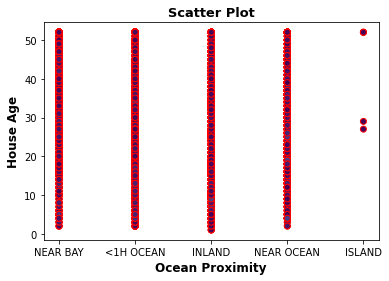

'\nFrom the scatter plot, we can conclude that the population of people living in\nIsland ocean proximity is much lower in compared to other ocean proximity. In addtion,\nwe an also say that the ocean proximity of near bay, <1H ocean, inland and near ocean\nis higly dense.\n'

In [32]:
# select population, age and ocean proximity
df_new = df[['population', 'housing_age', 'ocean_proximity']]

# plot scatter graph
plt.title("Scatter Plot", fontsize=13, fontweight='bold')
plt.xlabel('Ocean Proximity', fontsize=12, fontweight='bold')
plt.ylabel('House Age', fontsize=12, fontweight='bold')
plt.scatter(x=df_new['ocean_proximity'], y=df_new['housing_age'], c=df_new['population'], edgecolors='r')
plt.show()
'''
From the scatter plot, we can conclude that the population of people living in
Island ocean proximity is much lower in compared to other ocean proximity. In addtion,
we an also say that the ocean proximity of near bay, <1H ocean, inland and near ocean
is higly dense.
'''

2.  Draw a bar diagram of average values of all suitable columns. (excluding latitude, longitude and ocean proximity of course).

longitude            0
latitude             0
housing_age          0
total_rooms          0
total_bedrooms     207
population           0
families             0
average_income       0
ocean_proximity      0
house_value          0
dtype: int64


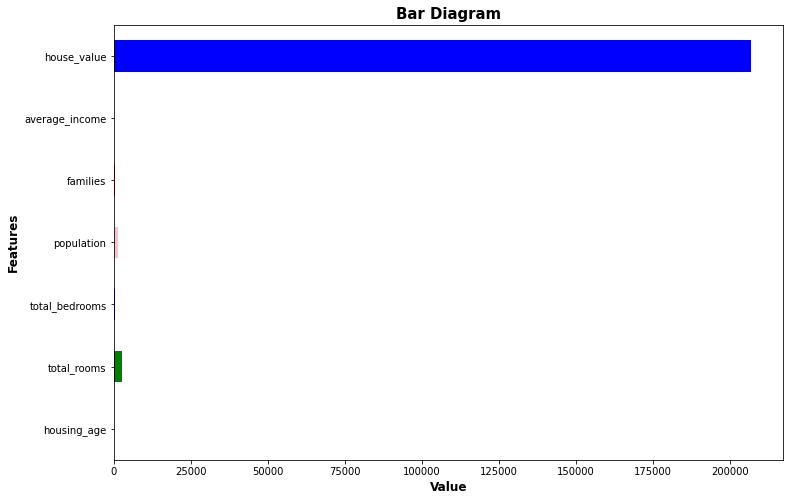

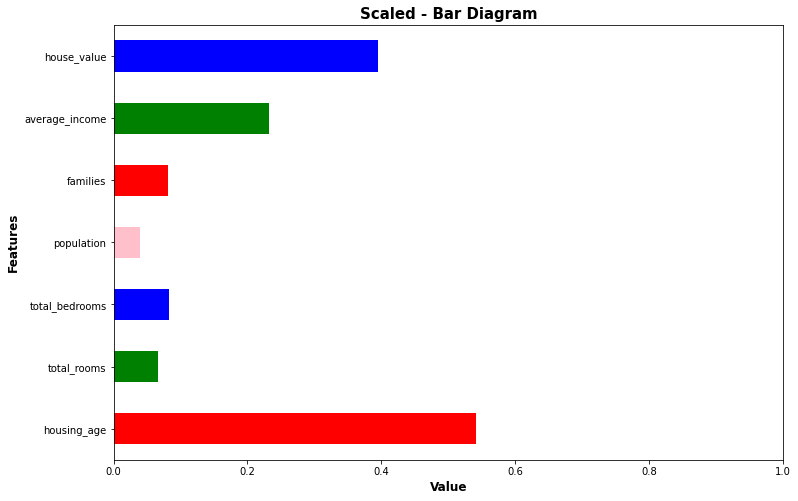

In [52]:
'''
Although this graph doesn't mean too much as every column have different
scale which means some columns have higher range and some have lower.
Other possible way to implement this would be after scaling.

I have decided to include both diagrams as scaled data can show the data properly.
'''
# check missing values
print(df.isna().sum())

# copy dataframe
clean_df = df.copy()

# drop missing values
clean_df.dropna(inplace=True)

# select columns
columns = ['housing_age','total_rooms', 'total_bedrooms', 'population', 'families', 'average_income', 'house_value']
data = clean_df[columns].agg('mean')
plt.title('Mean Bar Diagram', fontsize=15, fontweight='bold')
data.plot(kind='barh', figsize=(12,8), color=['red', 'green', 'blue', 'pink'], fontsize=10)
plt.xlabel("Value", fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.show()

# scale the columns
scaler = MinMaxScaler()
clean_df = scaler.fit_transform(clean_df[columns])
scaled_df = pd.DataFrame(clean_df, columns=columns)
# scaled data plot
data = scaled_df[columns].agg('mean')
plt.title('Scaled Mean - Bar Diagram', fontsize=15, fontweight='bold')
data.plot(kind='barh', figsize=(12,8), color=['red', 'green', 'blue', 'pink'], fontsize=10)
plt.xlabel("Value", fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.xlim([0,1])
plt.show()


3.   Visualize the differences in housing prices from the average price of housing using a bar diagram.

The average price is $206855.82


'\nExplanation:\nThe idea is to visualise the number of houses in range. The negative value refers\nto the less than the average house price and positive value refers to the above average price.\n\n'

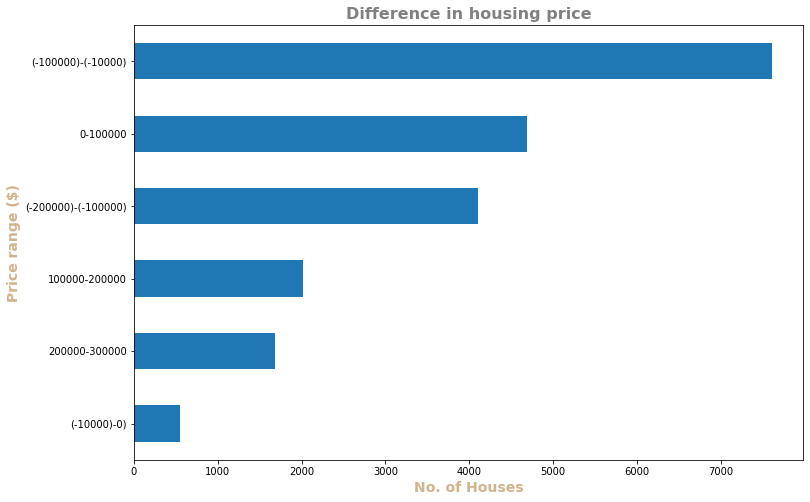

In [34]:
'''
For every house in the dataset would be way too much so I am dividing into
different range and counting them.
Also, the bar plot is sorted from highest difference to lowest.
'''
# copy dataframe
df_3 = df.copy()
# average housing value
avg_price = np.average(df_3['house_value'])
print(f'The average price is ${avg_price:.2f}')
# price difference
df_3['house_price'] = np.subtract(df_3['house_value'], avg_price)

# difference in price category
bin = [-200000, -100000, -10000, 0, 100000, 200000, 300000]
# labels for barplot
labels = ['(-200000)-(-100000)', '(-100000)-(-10000)', '(-10000)-0)', '0-100000', '100000-200000', '200000-300000']
# create new column
df_3['category'] = pd.cut(df_3['house_price'], bin, labels=labels)
# count frequency
freq_value = df_3['category'].value_counts().sort_values(ascending=True)
# plot bar plot
plt.title('Difference in housing price', fontsize=16, fontweight='bold', color='gray')
plt.xlabel('No. of Houses', fontsize=14, fontweight='bold', color='tan')
plt.ylabel('Price range ($)', fontsize=14, fontweight='bold', color='tan')
freq_value.plot(kind='barh', figsize=(12,8))
'''
Explanation:
The idea is to visualise the number of houses in range. The negative value refers
to the less than the average house price and positive value refers to the above average price.
'''

##**Part-3: File Management:**  *(6 marks: 2 question x 3 marks each)*

 

1.   Save the details of all housing blocks in a csv file having houses near oceans and  lower than the average of the housing value.

In [35]:
# houses near oceans
near_ocean = df[df['ocean_proximity'] == 'NEAR OCEAN']

# average housing value
avg_value = np.average(df['house_value'])

# houses near oceans and  lower than the average
housing_blocks = near_ocean[near_ocean['house_value'] < avg_value]

# save to csv
housing_blocks.to_csv('housing_blocks.csv', index=False)

# success message
print('File saved.')

File saved.







2.   Create a new housing dataset (a csv file) having only the location, total rooms and housing price information.






In [36]:
# select columns
col = ['longitude', 'latitude', 'total_rooms', 'house_value']
new_housing_dataset = df[col] #create dataframe from selected columns
new_housing_dataset.to_csv('new_housing_dataset.csv', index=False) # save csv
print('File sucessfully saved.') # success message

File sucessfully saved.
